In [23]:
import eli5
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import shap
from eli5.sklearn import PermutationImportance, explain_prediction
import eli5

In [13]:
RS = 7575

In [30]:
model_ada = pd.read_pickle('models/model_ada.pkl')
test_data = pd.read_csv("artifacts/train_vec_scores_nans.csv", index_col=0)

In [32]:
targets = ["Analytical thinking", "Systemic thinking", "Adaptability", "Focus"]

X = test_data.drop(targets, axis = 1).drop(["user_id"], axis = 1)
y = test_data[targets]

y_test_ada = y[["Adaptability"]]

y_test_sys = y[["Systemic thinking"]]

y_test_ana = y[["Analytical thinking"]]

y_test_foc = y[["Focus"]]

In [33]:
perm = PermutationImportance(model_ada, random_state=RS, n_iter=10).fit(X, y_test_ada)

In [35]:
eli5.show_weights(perm, feature_names=X.columns.tolist(), top=50)

Weight,Feature
0.0150 ± 0.0071,vec_401
0.0107 ± 0.0040,vec_45
0.0091 ± 0.0051,vec_29
0.0051 ± 0.0091,3_per_3_score
0.0032 ± 0.0012,vec_150
0.0032 ± 0.0022,2_per_0_score
0.0031 ± 0.0043,vec_352
0.0029 ± 0.0000,vec_406
0.0029 ± 0.0051,3_per_3_place
0.0028 ± 0.0009,vec_383


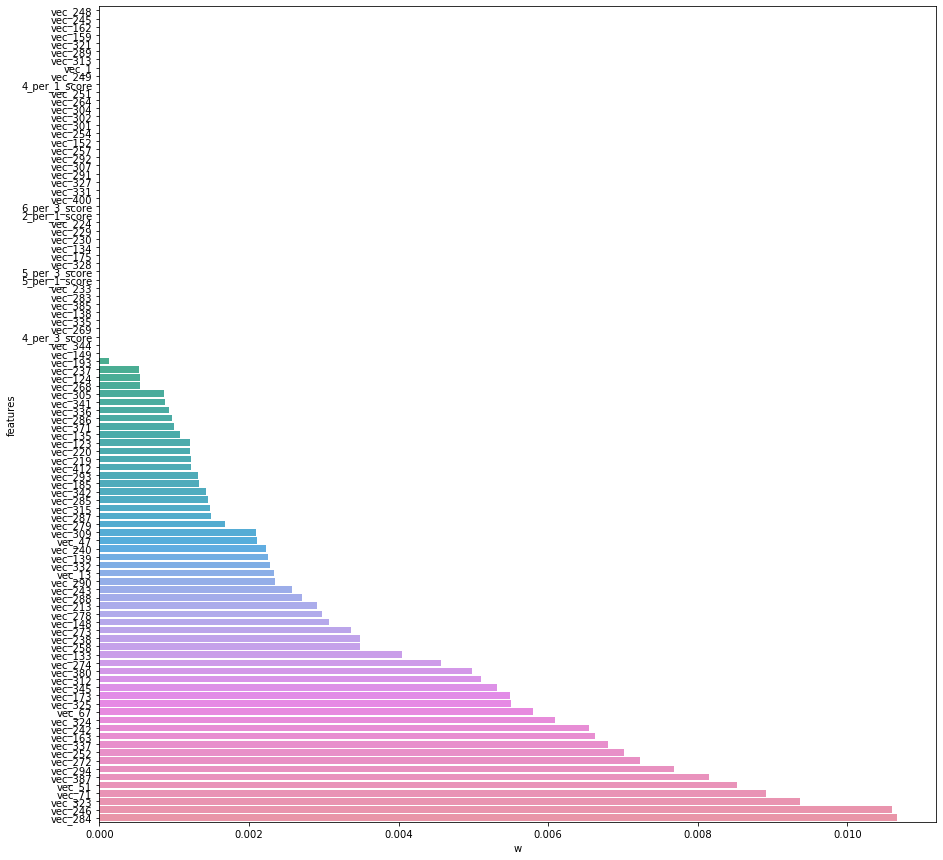

In [27]:
fi = pd.DataFrame(model_ada.feature_importances_, columns=["w"])

fi['features'] = X.columns
fi = fi.sort_values("w")
plt.figure(figsize=(15,15))
sns.barplot(data=fi[:100], y='features', x='w')

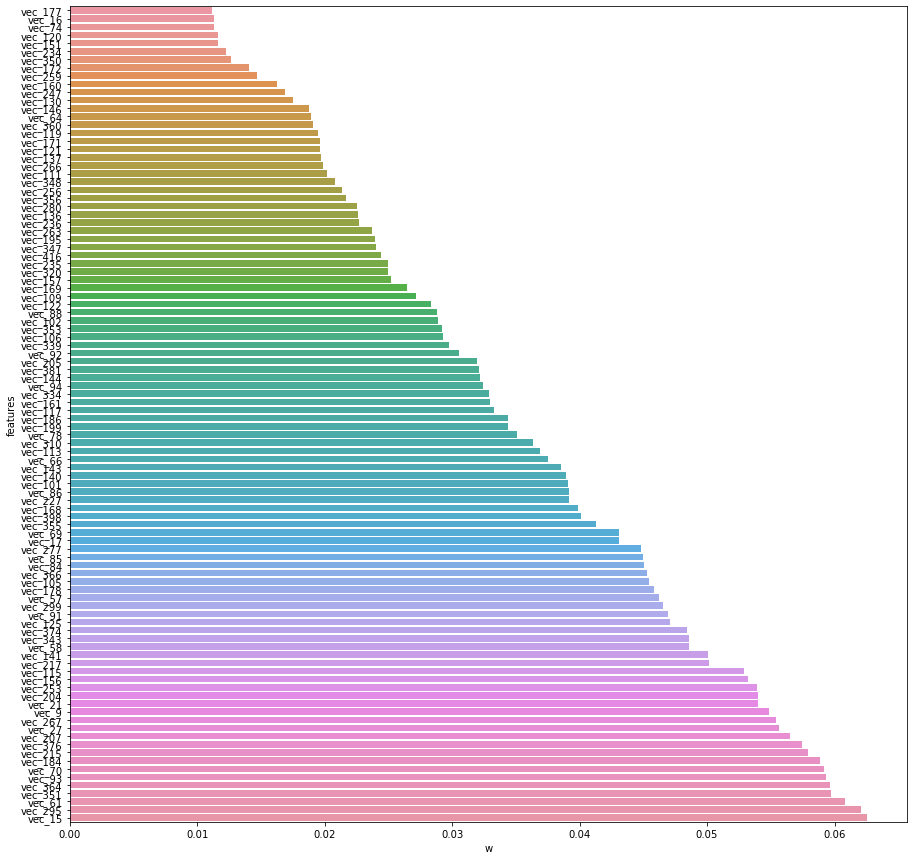

In [29]:
plt.figure(figsize=(15,15))
sns.barplot(data=fi[100:200], y='features', x='w')